In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import math

In [39]:
def function(x):
    return x**3+x-0.5

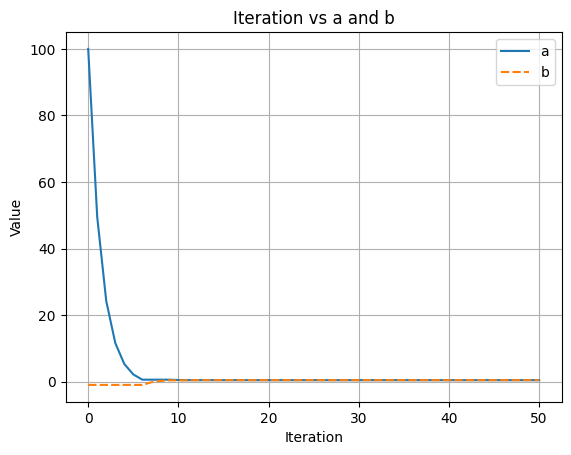

(0.4238537990697915,
              a         b       mean          f(a)          f(b)   result f(x)
 0   100.000000 -1.000000  49.500000  1.000100e+06 -2.500000e+00  1.213364e+05
 1    49.500000 -1.000000  24.250000  1.213364e+05 -2.500000e+00  1.428427e+04
 2    24.250000 -1.000000  11.625000  1.428427e+04 -2.500000e+00  1.582135e+03
 3    11.625000 -1.000000   5.312500  1.582135e+03 -2.500000e+00  1.547454e+02
 4     5.312500 -1.000000   2.156250  1.547454e+02 -2.500000e+00  1.168155e+01
 5     2.156250 -1.000000   0.578125  1.168155e+01 -2.500000e+00  2.713509e-01
 6     0.578125 -1.000000  -0.210938  2.713509e-01 -2.500000e+00 -7.203231e-01
 7     0.578125 -0.210938   0.183594  2.713509e-01 -7.203231e-01 -3.102179e-01
 8     0.578125  0.183594   0.380859  2.713509e-01 -3.102179e-01 -6.389550e-02
 9     0.578125  0.380859   0.479492  2.713509e-01 -6.389550e-02  8.973356e-02
 10    0.479492  0.380859   0.430176  8.973356e-02 -6.389550e-02  9.780327e-03
 11    0.430176  0.380859   0.4

In [40]:
def bisection_method(max_iter=50, a=None,b=None,function=None, tol=0, function_plot=False, analysis_range=[-100,100], dataframe=False, graph=False, final_row=False, result=True):

    if function(a)*function(b) > 0:
        raise ValueError

    array_list = [np.array([a,b,(a+b)/2,function(a),function(b),function((a+b)/2)])]
    for i in range(max_iter):

        if function((array_list[-1][0] + array_list[-1][1]) / 2) == 0:
            a = (array_list[-1][0] + array_list[-1][1]) / 2
            b = (array_list[-1][0] + array_list[-1][1]) / 2

        elif function(array_list[-1][0]) * function((array_list[-1][0] + array_list[-1][1]) / 2) < 0:
           a = array_list[-1][0]
           b = (array_list[-1][0] + array_list[-1][1]) / 2
        elif function(array_list[-1][0]) * function((array_list[-1][0] + array_list[-1][1]) / 2) > 0:
           a = (array_list[-1][0] + array_list[-1][1]) / 2
           b = array_list[-1][1]
        else:
            pass

        if abs(a-b) < tol:
            break

        array_list.append(np.array([a,b,(a+b)/2,function(a),function(b),function((a+b)/2)]))
    
    df = pd.DataFrame(array_list, columns=(['a','b','mean','f(a)','f(b)','result f(x)']))

    results = []


    if result:
        results.append(df.iloc[-1,2])

    if function_plot:
        x = np.arange(analysis_range[0],analysis_range[1],0.001)
        y = function(x)
        sns.lineplot(x=x, y=y)
        plt.title('Function Plot')
        plt.grid(True)
        plt.show()

    if final_row:
        results.append(df.iloc[-1,:])

    if dataframe:
        results.append(df)

    if graph:
        sns.lineplot(data=df[['a', 'b']])
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        plt.title('Iteration vs a and b')
        plt.grid(True)
        plt.show()

    if not results:
        return df.iloc[-1,:]

    if len(results) == 1:
        return results[0]
    else:
        return tuple(results)

bisection_method(50,100,-1,function, graph=True, dataframe=True)